In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import plotly.express as px
import plotly
import os
import sys
import seaborn as sns
import sklearn as sk
import miceforest as mf

pd.set_option('max_columns', 999)
pd.set_option('max_rows', 20)
cwd = os.getcwd()

In [1]:
# load original dataframe with NaNs in SES
df = pd.read_csv(cwd + "/out.csv", index_col=0)
print(df.head())
df_stats= pd.read_csv(cwd + "/df_stats.csv", index_col=0)
print(df_stats.head())

In [62]:
df_clean_2 = df.copy()

In [63]:
df_clean_2 = df_clean_2.astype({'OPLNIVMA': 'category', 'OPLNIVPA' : 'category', 'SECMMA': 'category', 'SECMPA': 'category', 'GENDER' : 'category', 'ETHN' : 'category', 'WPOTAALLV' : 'category', 'WPOTAALTV' : 'category', 'ADV_TEACH' : 'category', 'ADV_TEST' : 'category', 'ADV_FINAL' : 'category', 'LEVEL3' : 'category'})

In [64]:
df_clean_2.dtypes

GENDER           float64
ETHN             float64
WPOTAALLV        float64
WPOTAALTV        float64
ADV_TEACH        float64
ADV_TEST         float64
ADV_FINAL        float64
LEVEL3           float64
WOZ              float64
PERCBESTINKO     float64
OPLNIVMA        category
OPLNIVPA        category
SECMMA           float64
SECMPA           float64
dtype: object

In [65]:
kernelMeanMatch = mf.MultipleImputedKernel(df_clean_2, datasets=5, save_all_iterations=True, random_state=42, mean_match_candidates=5)
kernelMeanMatch.mice(5)

new_data = kernelMeanMatch.complete_data(0)
new_data.reset_index(drop=True, inplace=True)
df_stats.reset_index(drop=True, inplace=True)
new_data = pd.concat([new_data, df_stats], axis=1)
new_data.to_csv('out1.csv')

new_data1 = kernelMeanMatch.complete_data(1)
new_data1.reset_index(drop=True, inplace=True)
new_data1 = pd.concat([new_data1, df_stats], axis=1)
new_data1.to_csv('out2.csv')

new_data2 = kernelMeanMatch.complete_data(2)
new_data2.reset_index(drop=True, inplace=True)
new_data2 = pd.concat([new_data2, df_stats], axis=1)
new_data2.to_csv('out3.csv')

new_data3 = kernelMeanMatch.complete_data(3)
new_data3.reset_index(drop=True, inplace=True)
new_data3 = pd.concat([new_data3, df_stats], axis=1)
new_data3.to_csv('out4.csv')

new_data4 = kernelMeanMatch.complete_data(4)
new_data4.reset_index(drop=True, inplace=True)
new_data4 = pd.concat([new_data4, df_stats], axis=1)
new_data4.to_csv('out5.csv')

In [72]:
# print results
print(kernelMeanMatch)
print("numerical vars:")
print(kernelMeanMatch._get_num_vars())
print("categorical vars:")
print(kernelMeanMatch._get_cat_vars())

              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 5
         Iterations: 5
  Imputed Variables: 2
save_all_iterations: True
numerical vars:
[]
categorical vars:
['OPLNIVMA', 'OPLNIVPA']


In [73]:
#only numerical variables
# kernelMeanMatch.plot_imputed_distributions(wspace=0.5, hspace=0.7)

In [74]:
# kernelMeanMatch.plot_correlations()

In [75]:
# kernelMeanMatch.plot_mean_convergence(wspace=0.5, hspace=0.7)

AxesSubplot(0.125,0.125;0.62x0.755)


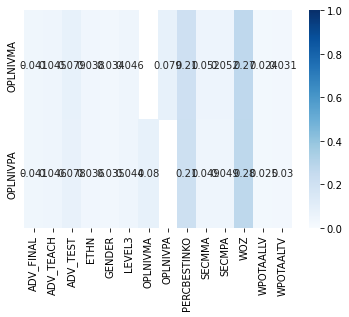

In [76]:
kernelMeanMatch.plot_feature_importance(annot=True, cmap="Blues", vmin=0, vmax=1)

<AxesSubplot:xlabel='value', ylabel='count'>

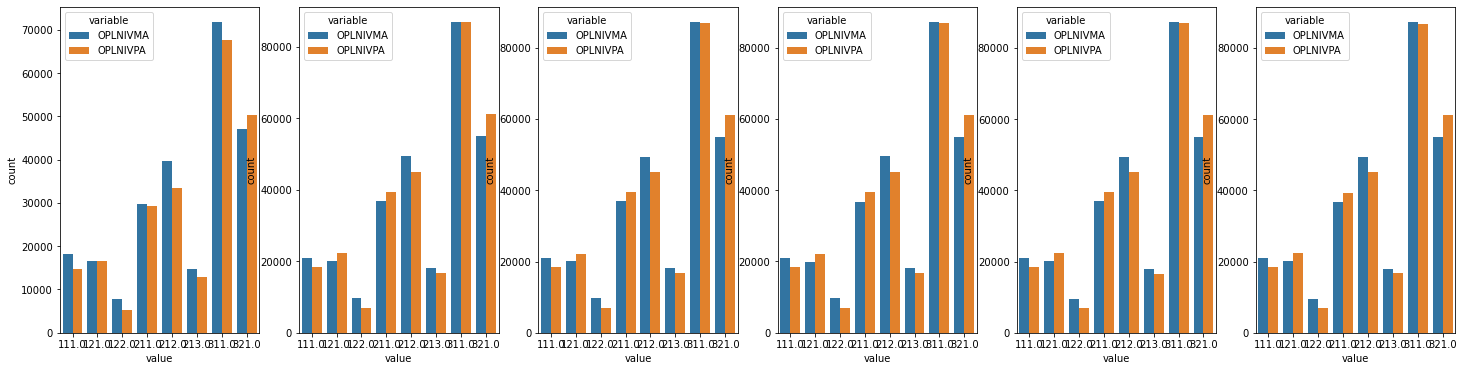

In [77]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(25, 6))
sns.countplot(x="value", hue="variable", data=pd.melt(df[["OPLNIVMA", "OPLNIVPA"]]), ax=ax1)
sns.countplot(x="value", hue="variable", data=pd.melt(new_data[["OPLNIVMA", "OPLNIVPA"]]), ax=ax2)
sns.countplot(x="value", hue="variable", data=pd.melt(new_data1[["OPLNIVMA", "OPLNIVPA"]]), ax=ax3)
sns.countplot(x="value", hue="variable", data=pd.melt(new_data2[["OPLNIVMA", "OPLNIVPA"]]), ax=ax4)
sns.countplot(x="value", hue="variable", data=pd.melt(new_data3[["OPLNIVMA", "OPLNIVPA"]]), ax=ax5)
sns.countplot(x="value", hue="variable", data=pd.melt(new_data4[["OPLNIVMA", "OPLNIVPA"]]), ax=ax6)